In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#show all columns
pd.set_option('display.max_columns', None)

## Exploring Dataset

In [49]:
#import the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [50]:
#Removing 'Gender' cuz that seems irrelevent
df = df.drop(columns = 'Gender')

In [51]:
df.shape

(6607, 19)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [53]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [54]:
#There are 2 inconsitancies - 101 in max exam marks , Nan values


In [55]:
def check_max_val(df):
    return (df['Exam_Score'] > 100).sum()
    

In [56]:
check_max_val(df)

np.int64(1)

In [57]:
df = df.drop(index = df[df['Exam_Score'] > 100].index)
check_max_val(df)

np.int64(0)

## Handling NaN values

In [59]:
df.isnull().sum().sort_values(ascending = False)

Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Parental_Involvement           0
Attendance                     0
Hours_Studied                  0
Access_to_Resources            0
Motivation_Level               0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Family_Income                  0
Tutoring_Sessions              0
Internet_Access                0
School_Type                    0
Physical_Activity              0
Peer_Influence                 0
Learning_Disabilities          0
Exam_Score                     0
dtype: int64

In [60]:
cat_f = df.select_dtypes(include='object').columns.tolist()

In [61]:
#missing val fill by mode as they are obj dtype
def fill_nan(cat_f):
    for col in cat_f:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [62]:
fill_nan(cat_f)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,68


In [63]:
df.isnull().sum().sum()

np.int64(0)

## Inspecting and Handling Skew

In [64]:
#check for skew , standerdize , encode 

In [65]:
num_f = df.select_dtypes(include='number').columns.tolist()

In [66]:
num_f

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [67]:
def check_skew(num_f):
    for col in num_f:
        print(f"{col} : {df[col].skew():.2f}")
        

In [68]:
check_skew(num_f)

Hours_Studied : 0.01
Attendance : 0.01
Sleep_Hours : -0.02
Previous_Scores : -0.00
Tutoring_Sessions : 0.81
Physical_Activity : -0.03
Exam_Score : 1.58


In [69]:
#Transform skewd ones 
df['Tutoring_Sessions'] = np.log1p(df['Tutoring_Sessions'])
df['Exam_Score'] = np.log1p(df['Exam_Score'])

In [70]:
check_skew(num_f)

Hours_Studied : 0.01
Attendance : 0.01
Sleep_Hours : -0.02
Previous_Scores : -0.00
Tutoring_Sessions : -0.21
Physical_Activity : -0.03
Exam_Score : 0.94


<Axes: xlabel='Exam_Score', ylabel='Count'>

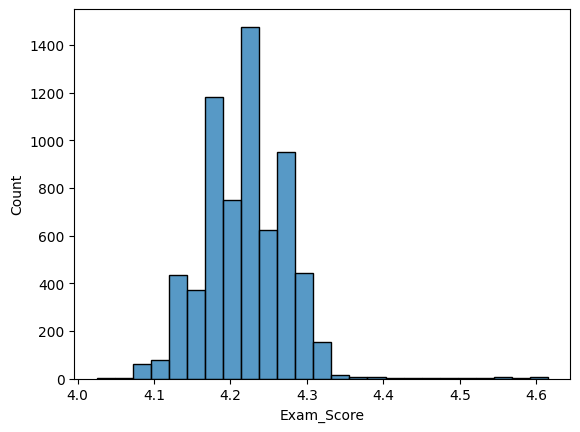

In [71]:
sns.histplot(data = df, x = 'Exam_Score', bins = 25)

In [72]:
num_f 

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [73]:
num_f.remove('Exam_Score')

## Standardization

In [74]:
def standardize(X):
    mean = X.mean()
    std = X.std()
    return (X-mean)/std

In [75]:
for col in num_f:
    df[col] = standardize(df[col])

In [76]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,0.505095,0.348623,Low,High,No,-0.019899,-0.143607,Low,Yes,-1.524407,Low,Medium,Public,Positive,0.031411,No,High School,Near,4.219508
1,-0.162637,-1.383546,Low,Medium,No,0.661217,-1.115884,Low,Yes,0.603187,Medium,Medium,Public,Negative,1.001053,No,College,Moderate,4.127134
2,0.672028,1.561141,Medium,Medium,Yes,-0.019899,1.106464,Medium,Yes,0.603187,Medium,Medium,Public,Neutral,1.001053,No,Postgraduate,Near,4.317488
3,1.506694,0.781665,Low,Medium,Yes,0.661217,1.592603,Medium,Yes,-0.182044,Medium,Medium,Public,Negative,1.001053,No,High School,Moderate,4.276666
4,-0.162637,1.041491,Medium,Medium,Yes,-0.701016,-0.699194,Medium,Yes,1.160318,Medium,High,Public,Neutral,1.001053,No,College,Near,4.262680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838961,-0.950503,High,Medium,No,-0.019899,0.064739,Medium,Yes,-0.182044,High,Medium,Public,Positive,-0.938230,No,High School,Near,4.234107
6603,0.505095,-0.344244,High,Medium,No,0.661217,0.411980,Medium,Yes,1.160318,Low,High,Public,Positive,-0.938230,No,High School,Near,4.248495
6604,0.004296,0.868274,Medium,Low,Yes,-0.701016,-0.699194,Low,Yes,1.160318,Low,Medium,Public,Negative,-0.938230,No,Postgraduate,Near,4.234107
6605,-1.665035,0.521840,High,High,Yes,-0.701016,1.106464,High,Yes,0.603187,Low,Medium,Private,Positive,0.031411,No,High School,Far,4.234107


## Label Encoding

In [77]:
dict_lmh = {'Low': 0, 'Medium': 1, 'High': 2}
dict_hml = { 'High': 2, 'Medium': 1, 'Low': 0}
dict_mhl = {'Medium': 1, 'High': 2, 'Low': 0}
dict_ny = {'No': 0, 'Yes': 1}
dict_yn = {'Yes': 1, 'No': 0}
dict_pp = {'Public': 0, 'Private': 1}
dict_pnn = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
dict_hcp = {'High School': 0, 'College': 1, 'Postgraduate': 2}
dict_nmf = {'Near': 2, 'Moderate': 1, 'Far': 0}

In [78]:
df['Parental_Involvement'] = df['Parental_Involvement'].map( dict_lmh )
df['Access_to_Resources'] = df['Access_to_Resources'].map( dict_hml )
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map( dict_ny )
df['Motivation_Level'] = df['Motivation_Level'].map( dict_lmh )
df['Internet_Access'] = df['Internet_Access'].map( dict_yn )
df['Family_Income'] = df['Family_Income'].map( dict_lmh )
df['Teacher_Quality'] = df['Teacher_Quality'].map( dict_mhl )
df['School_Type'] = df['School_Type'].map( dict_pp )
df['Peer_Influence'] = df['Peer_Influence'].map( dict_pnn )
df['Learning_Disabilities'] = df['Learning_Disabilities'].map( dict_ny )
df['Parental_Education_Level'] = df['Parental_Education_Level'].map( dict_hcp )
df['Distance_from_Home'] = df['Distance_from_Home'].map( dict_nmf )

In [79]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,0.505095,0.348623,0,2,0,-0.019899,-0.143607,0,1,-1.524407,0,1,0,1,0.031411,0,0,2,4.219508
1,-0.162637,-1.383546,0,1,0,0.661217,-1.115884,0,1,0.603187,1,1,0,-1,1.001053,0,1,1,4.127134
2,0.672028,1.561141,1,1,1,-0.019899,1.106464,1,1,0.603187,1,1,0,0,1.001053,0,2,2,4.317488
3,1.506694,0.781665,0,1,1,0.661217,1.592603,1,1,-0.182044,1,1,0,-1,1.001053,0,0,1,4.276666
4,-0.162637,1.041491,1,1,1,-0.701016,-0.699194,1,1,1.160318,1,2,0,0,1.001053,0,1,2,4.262680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838961,-0.950503,2,1,0,-0.019899,0.064739,1,1,-0.182044,2,1,0,1,-0.938230,0,0,2,4.234107
6603,0.505095,-0.344244,2,1,0,0.661217,0.411980,1,1,1.160318,0,2,0,1,-0.938230,0,0,2,4.248495
6604,0.004296,0.868274,1,0,1,-0.701016,-0.699194,0,1,1.160318,0,1,0,-1,-0.938230,0,2,2,4.234107
6605,-1.665035,0.521840,2,2,1,-0.701016,1.106464,2,1,0.603187,0,1,1,1,0.031411,0,0,0,4.234107


## Correlation Analysis

In [80]:
mycorr = df.corr()

Text(0.5, 1.0, 'Correlation with Selling Price')

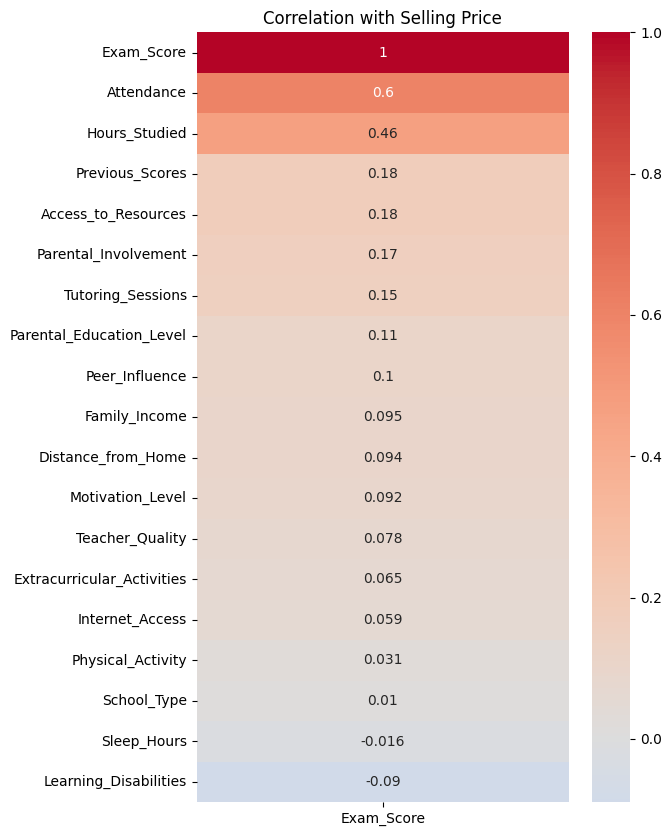

In [81]:
corr_with_target = mycorr[['Exam_Score']].sort_values('Exam_Score', ascending=False)

# Plot only correlations with the target
plt.figure(figsize=(6, 10))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with Selling Price")

## Splitting Dataset

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop(columns = 'Exam_Score')
y = df['Exam_Score']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
                                               

## Training Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred_test_log = model.predict(X_test)

In [88]:
y_pred_train_log = model.predict(X_train)

In [89]:
y_pred_train = np.expm1(y_pred_train_log) 

In [90]:
y_train = np.expm1(y_train)

In [91]:
#Inverse transformation
y_pred_test =  np.expm1(y_pred_test_log)

In [92]:
y_test =  np.expm1(y_test)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [94]:
rmse_ts = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_ts = mean_absolute_error(y_test, y_pred_test)
r2_ts = r2_score(y_test, y_pred_test)

## Evaluation

In [95]:
print("Test Results")
print(f"RMSE: {rmse_ts:.2f}")
print(f"MAE: {mae_ts:.2f}")
print(f"R²: {r2_ts:.3f}")

Test Results
RMSE: 1.53
MAE: 0.43
R²: 0.824


In [96]:
rmse_tr = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_tr = mean_absolute_error(y_train, y_pred_train)
r2_tr = r2_score(y_train, y_pred_train)

In [97]:
print("Train Results")
print(f"RMSE: {rmse_tr:.2f}")
print(f"MAE: {mae_tr:.2f}")
print(f"R²: {r2_tr:.3f}")

Train Results
RMSE: 2.11
MAE: 0.52
R²: 0.709


Text(0.5, 1.0, 'Residual Plot')

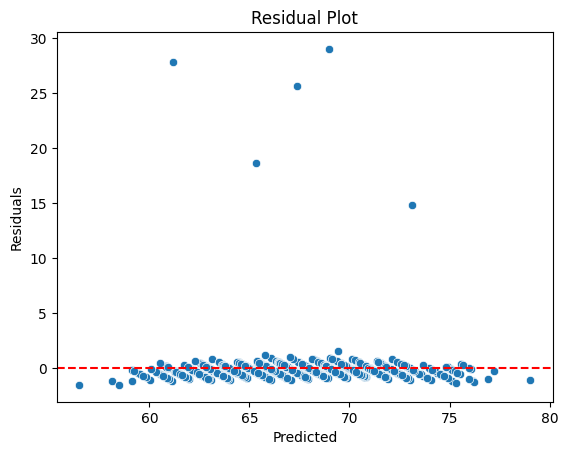

In [99]:
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test , y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")